In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



In [ ]:


# Importar el archivo CSV
ruta_csv = r"..\Datasets\FILTRADO\filtro_Kentucky.csv"
df = pd.read_csv(ruta_csv)

# Importar el archivo de sitios
sitio_csv = r"C:\Users\pablo\OneDrive\Documentos\CURSOS\HENRY\PROYECTO FINAL\Datasets\FILTRADO\sitios_filtrado.csv"
df_sitio = pd.read_csv(sitio_csv)


In [4]:
df_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN,33.916402,-118.010855,['Restaurant'],4.5,18,NaN,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,NaN,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,NaN,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,NaN,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,NaN,21.637796,-157.920714,['Restaurant'],4.4,18,NaN,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [5]:
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,116690470932295458072,Dan Patterson,1498361510706,5,"My Brother in law brought me here, one of his ...",[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x8843382b932e8cb9:0x739839461912c1cb
1,108973373042726491018,Josh Clarke,1451520549065,5,"This place always has fantastic food, and amaz...",NaN,NaN,0x8843382b932e8cb9:0x739839461912c1cb
2,110279185085425352655,Doug Hacker,1483718075184,5,Best pizza in town!,NaN,NaN,0x8843382b932e8cb9:0x739839461912c1cb
3,104030466980999229255,brandon pennington,1513719588488,4,NaN,NaN,NaN,0x8843382b932e8cb9:0x739839461912c1cb
4,112494094496224355387,Tanisha Melton,1510365776008,4,NaN,NaN,NaN,0x8843382b932e8cb9:0x739839461912c1cb


In [6]:
df = df.merge(df_sitio[['gmap_id', 'name']], on='gmap_id', how='left')

In [7]:
# Cambiar el nombre de las columnas name_x y name_y
df = df.rename(columns={'name_x': 'name', 'name_y': 'name_sitio'})

In [8]:
# Cantidad de filas y columnas
df.shape

(145031, 9)

In [9]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id       object
name          object
time           int64
rating         int64
text          object
pics          object
resp          object
gmap_id       object
name_sitio    object
dtype: object


In [10]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'name_sitio'],
      dtype='object')

In [11]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [12]:
df.duplicated().sum()

5130

In [13]:
# Filas duplicadas (incluyendo los originales)
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)


                     user_id            name           time  rating  \
72144  100006208756082938492     Mike Pascal  1532030092791       5   
72159  100006208756082938492     Mike Pascal  1532030092791       5   
23751  100014103020425975524   Lakisha Bland  1578241958948       5   
23768  100014103020425975524   Lakisha Bland  1578241958948       5   
39791  100022614816583806818  montana patten  1521322524819       4   
...                      ...             ...            ...     ...   
99235  118421744363864800012     Steven Ware  1621039753823       5   
85944  118430782521802178766     Tom Thacker  1544464426752       5   
85947  118430782521802178766     Tom Thacker  1544464426752       5   
29772  118434732297599214276     Chris Durso  1500402476350       3   
29804  118434732297599214276     Chris Durso  1500402476350       3   

                                                    text  pics  \
72144  I'm not a breakfast food person, however the f...  <NA>   
72159  I'm not 

In [14]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [15]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id            0
name               3
time               0
rating             0
text           60744
pics          136746
resp          123217
gmap_id            0
name_sitio         0
dtype: int64

In [16]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id        0.000000
name           0.002144
time           0.000000
rating         0.000000
text          43.419275
pics          97.744834
resp          88.074424
gmap_id        0.000000
name_sitio     0.000000
dtype: float64

In [17]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,time,rating
count,1.399010e+05,139901.000000
mean,1.554506e+12,4.194988
std,4.040624e+10,1.132040
min,1.184775e+12,1.000000
25%,1.527986e+12,4.000000
50%,1.556232e+12,5.000000
75%,1.580682e+12,5.000000
max,1.630925e+12,5.000000


In [18]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 14350


In [19]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

time: 977 outliers
rating: 13373 outliers


In [20]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1498361510706 2017-06-25 03:31:50.706
2  1451520549065 2015-12-31 00:09:09.065
4  1483718075184 2017-01-06 15:54:35.184
6  1513719588488 2017-12-19 21:39:48.488
8  1510365776008 2017-11-11 02:02:56.008


In [21]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,name_sitio,fecha
0,116690470932295458072,Dan Patterson,1498361510706,5,"My Brother in law brought me here, one of his ...",[{'url': ['https://lh5.googleusercontent.com/p...,<NA>,0x8843382b932e8cb9:0x739839461912c1cb,Higgy's Pizza,2017-06-25 03:31:50.706
2,108973373042726491018,Josh Clarke,1451520549065,5,"This place always has fantastic food, and amaz...",<NA>,<NA>,0x8843382b932e8cb9:0x739839461912c1cb,Higgy's Pizza,2015-12-31 00:09:09.065
4,110279185085425352655,Doug Hacker,1483718075184,5,Best pizza in town!,<NA>,<NA>,0x8843382b932e8cb9:0x739839461912c1cb,Higgy's Pizza,2017-01-06 15:54:35.184
6,104030466980999229255,brandon pennington,1513719588488,4,<NA>,<NA>,<NA>,0x8843382b932e8cb9:0x739839461912c1cb,Higgy's Pizza,2017-12-19 21:39:48.488
8,112494094496224355387,Tanisha Melton,1510365776008,4,<NA>,<NA>,<NA>,0x8843382b932e8cb9:0x739839461912c1cb,Higgy's Pizza,2017-11-11 02:02:56.008


# Análisis de Rating

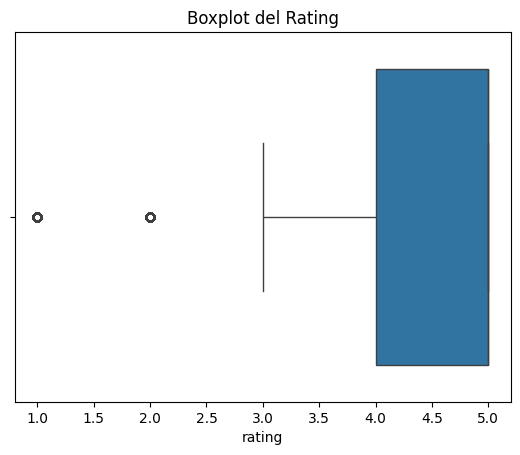

In [22]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

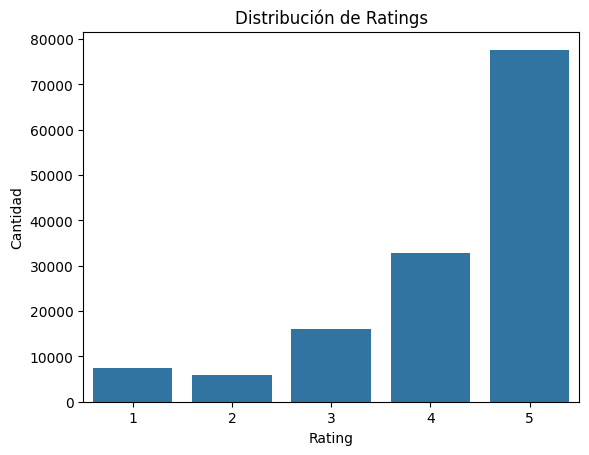

In [23]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()


In [24]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1      7468            5.34
2            2      5905            4.22
3            3     16139           11.54
4            4     32757           23.41
5            5     77632           55.49


Análisis:

Más del 79% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 9% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.


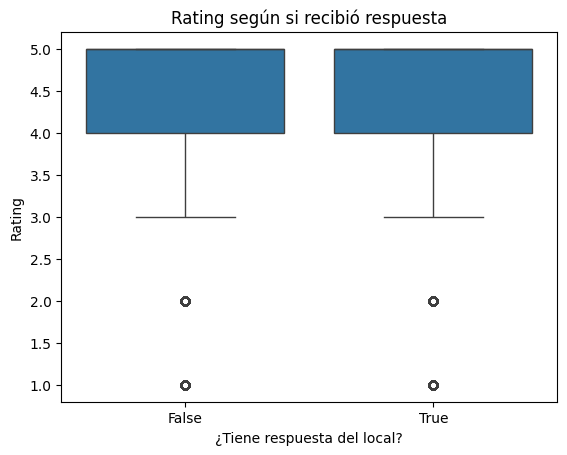

In [25]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

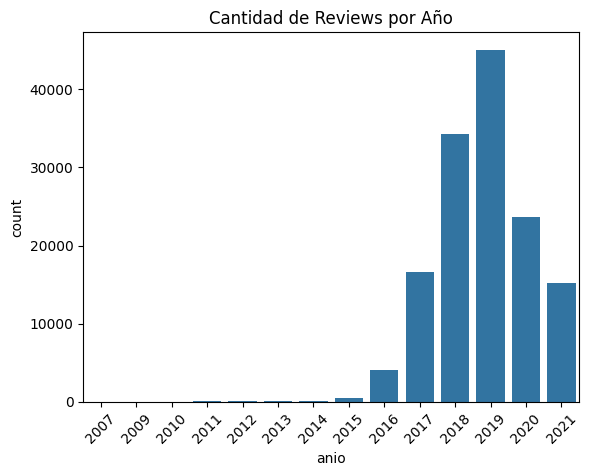

In [26]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2007                    1
1   2009                    1
2   2010                   23
3   2011                   90
4   2012                  135
5   2013                  149
6   2014                  147
7   2015                  532
8   2016                 4041
9   2017                16623
10  2018                34233
11  2019                45029
12  2020                23636
13  2021                15261


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 45029 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [28]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 79157 (56.58%)
Reviews con fotos: 3155 (2.26%)
Reviews con respuesta: 16684 (11.93%)


In [29]:
print("Lugares únicos (gmap_id):", df['name_sitio'].nunique())

Lugares únicos (gmap_id): 1148


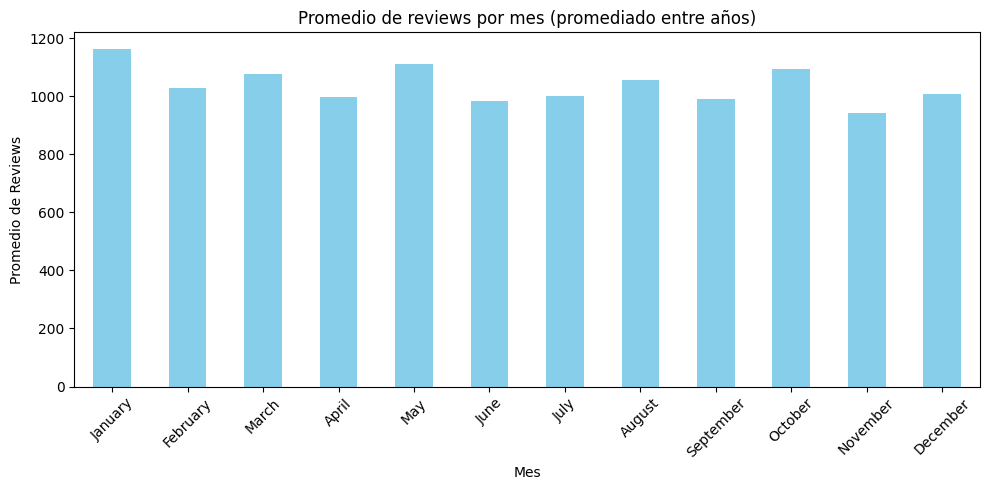

In [30]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January              1161.64
1    February              1028.42
2       March              1077.25
3       April               998.09
4         May              1110.55
5        June               983.92
6        July               998.83
7      August              1055.91
8   September               989.73
9     October              1093.80
10   November               941.64
11   December              1006.27


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, enero, mayo y octubre muestran una actividad más fuerte en promedio.

Meses más bajos: febrero y noviembre
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.

# Análisis de Lugares

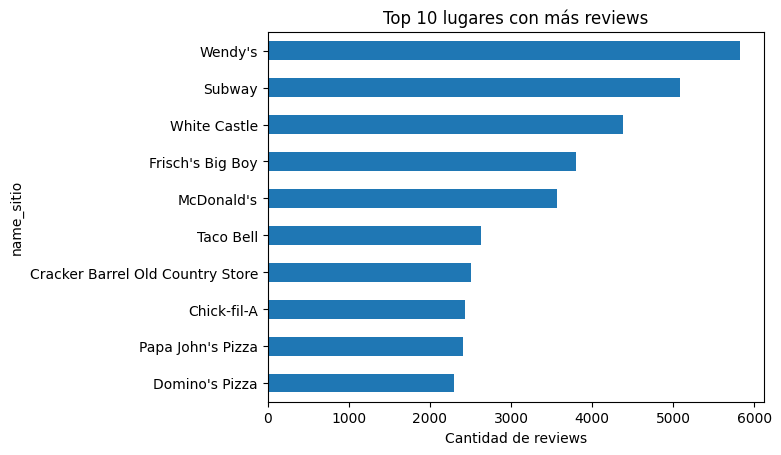

In [32]:
top_lugares = df['name_sitio'].value_counts().head(10)
top_lugares.plot(kind='barh')
plt.title("Top 10 lugares con más reviews")
plt.xlabel("Cantidad de reviews")
plt.ylabel("name_sitio")
plt.gca().invert_yaxis()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_18484\273206112.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')


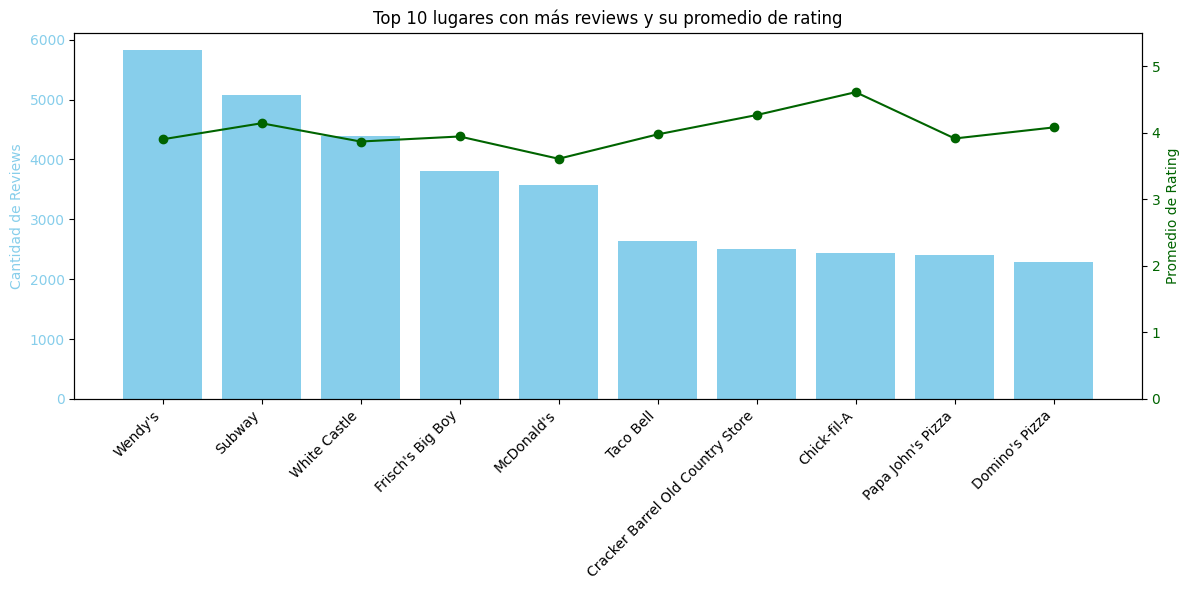

In [33]:
# Agrupar por lugar: contar y promediar ratings
estadisticas = df.groupby('name_sitio')['rating'].agg(['count', 'mean']).reset_index()
estadisticas.columns = ['name_sitio', 'Cantidad de Reviews', 'Promedio de Rating']

# Filtrar lugares con al menos 50 reviews
estadisticas_filtradas = estadisticas[estadisticas['Cantidad de Reviews'] >= 50]

# Elegir los 10 lugares con más reviews (para orden visual claro)
top10 = estadisticas_filtradas.sort_values(by='Cantidad de Reviews', ascending=False).head(10)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: cantidad de reviews
ax1.bar(top10['name_sitio'], top10['Cantidad de Reviews'], color='skyblue', label='Cantidad de Reviews')
ax1.set_ylabel('Cantidad de Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')

# Eje derecho: promedio de rating
ax2 = ax1.twinx()
ax2.plot(top10['name_sitio'], top10['Promedio de Rating'], color='darkgreen', marker='o', label='Promedio de Rating')
ax2.set_ylabel('Promedio de Rating', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(0, 5.5)

# Título y leyenda
plt.title('Top 10 lugares con más reviews y su promedio de rating')
fig.tight_layout()
plt.show()



Análisis:
Todos los lugares del top tienen un rating promedio alto, mayor a 3, lo que muestra una alta satisfacción de los usuarios.

La cantidad de reviews varía, pero todos superan las 2000, lo cual da más confianza en la calidad del promedio.

Wendy´s a pesar de tener el numero mayor de review tiene un promedio de rating regular.

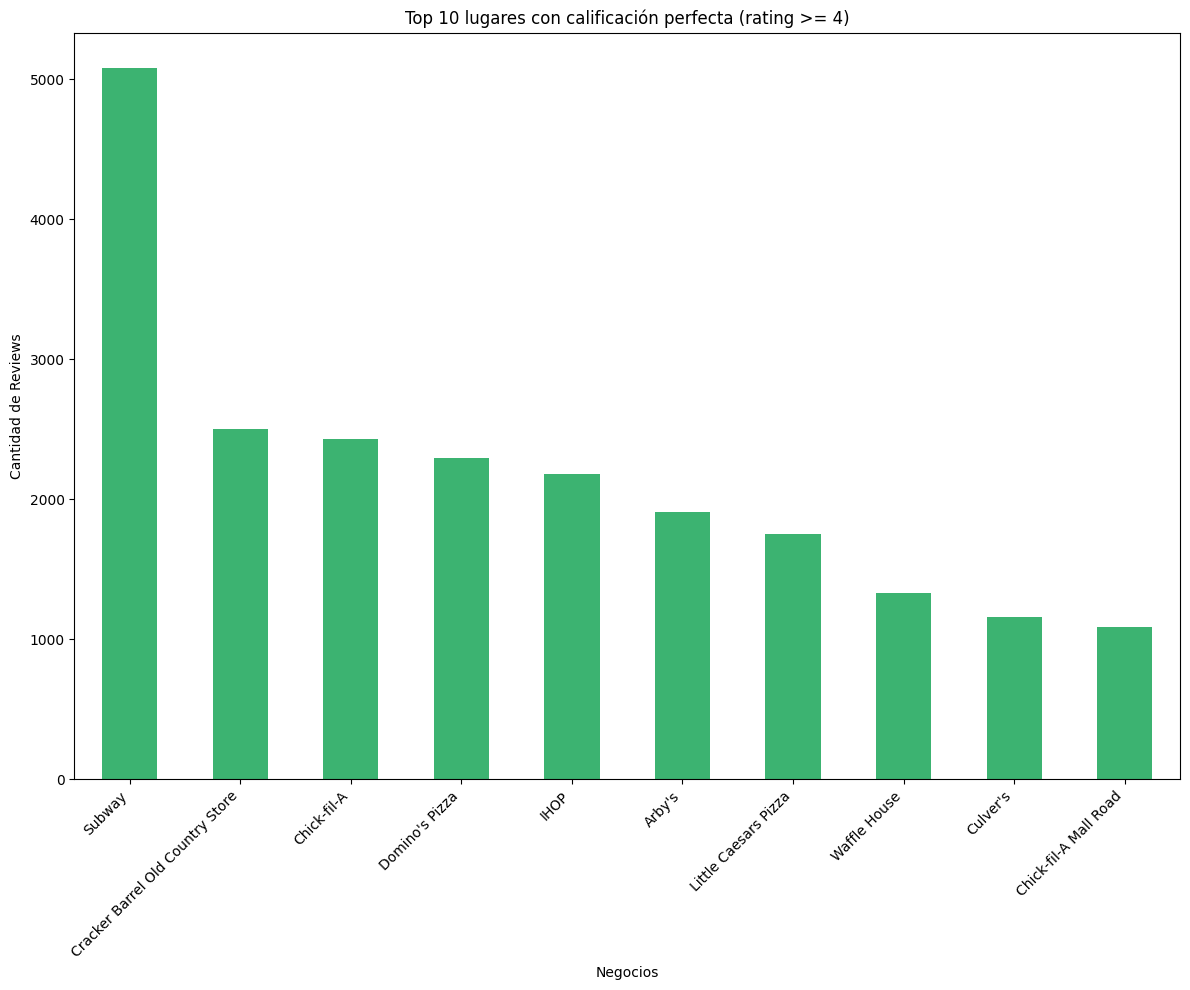

In [34]:
# Asegurar que la fecha esté en formato datetime (por si acaso)
df['fecha'] = pd.to_datetime(df['time'], unit='ms')

# Calcular el promedio de rating por lugar (gmap_id)
rating_promedio = df.groupby('name_sitio')['rating'].mean()

# Filtrar lugares con calificación perfecta
rating_maximos = rating_promedio[rating_promedio >= 4]

# Filtrar el DataFrame original para obtener solo esos lugares
top_rating_5 = df[df['name_sitio'].isin(rating_maximos.index)]

# Contar cantidad de reviews por gmap_id con rating >= 4 y quedarnos con los 10 más reseñados
top_rating_5_count = top_rating_5['name_sitio'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 10))
top_rating_5_count.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 lugares con calificación perfecta (rating >= 4)")
plt.xlabel("Negocios")
plt.ylabel("Cantidad de Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Análisis:

Alta satisfacción con volumen relevante, todos los lugares listados tienen una combinación ideal de rating alto y muchas reseñas. Eso indica que no solo tuvieron buena suerte con pocas opiniones, sino que muchos usuarios coincidieron en su buena experiencia. Se marca la diferencia del negocio Subway por la cantidad de reviews.

Estos 10 lugares combinan excelencia en atención/producto con volumen de participación de usuarios, lo que los posiciona como referentes en calidad y satisfacción.